# Assignment: Оптимизация в Python: глобальная оптимизация и оптимизация негладкой функции

Данное задание основано на материалах секции, посвященной оптимизационным задачам и методам из решения. Вам понадобится компьютер с установленным интерпретатором Python и подключенными библиотеками NumPy, SciPy и Matplotlib.

Вы научитесь:

* применять библиотеку SciPy для минимизации функций
* делать выбор между градиентными и неградиентными методами оптимизации, исходя из особенностей задачи и ваших пожеланий к итоговому решению

## Введение

В этом задании вы научитесь решать задачи оптимизации с помощью библиотеки SciPy. Сначала вы решите задачу поиска минимума функции с помощью одного из градиентных методов оптимизации, затем увидите отличия в работе градиентного метода и одного из методов глобальной оптимизации, а в заключение – найдете глобальный минимум негладкой функции, т.е. функции, у которой не всегда определен градиент.

Понимание задачи глобальной оптимизации и отличий градиентных методов, от методов, не использующих градиент, очень полезно в задачах анализа данных, в частности, для подбора параметров алгоритмов.

## Материалы

Справка по функциям пакета scipy.optimize: http://docs.scipy.org/doc/scipy/reference/optimize.html
Matplotlib User Guide: http://matplotlib.org/users/index.html

## Задание

Данное задание состоит из трех частей. В каждой ответом будет набор чисел, который вам нужно будет набрать через пробел в текстовом файле и загрузить. Десятичные дроби записывайте через точку.

### Задача 1. Минимизация гладкой функции

* Рассмотрим все ту же функцию из задания по линейной алгебре: f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2), но теперь уже на промежутке [1, 30]
* В первом задании будем искать минимум этой функции на заданном промежутке с помощью scipy.optimize. Разумеется, в дальнейшем вы будете использовать методы оптимизации для более сложных функций, а f(x) мы рассмотрим как удобный учебный пример.
* Напишите на Питоне функцию, вычисляющую значение f(x) по известному x. Будьте внимательны: не забывайте про то, что по умолчанию в питоне целые числа делятся нацело, и о том, что функции sin и exp нужно импортировать из модуля math.
* Изучите примеры использования scipy.optimize.minimize в документации Scipy (см. "Материалы")
* Попробуйте найти минимум, используя стандартные параметры в функции scipy.optimize.minimize (т.е. задав только функцию и начальное приближение). Попробуйте менять начальное приближение и изучить, меняется ли результат.
* Укажите в scipy.optimize.minimize в качестве метода BFGS (один из самых точных в большинстве случаев градиентных методов оптимизации), запустите из начального приближения x=2. Градиент функции при этом указывать не нужно – он будет оценен численно. Полученное значение функции в точке минимума - ваш первый ответ по заданию 1, его надо записать с точностью до 2 знака после запятой.
* Теперь измените начальное приближение на x=30. Значение функции в точке минимума - ваш второй ответ по заданию 1, его надо записать через пробел после первого, с точностью до 2 знака после запятой.
* Стоит обдумать полученный результат. Почему ответ отличается в зависимости от начального приближения? Если нарисовать график функции (например, как это делалось в видео, где мы знакомились с Numpy, Scipy и Matplotlib), можно увидеть, в какие именно минимумы мы попали. В самом деле, градиентные методы обычно не решают задачу глобальной оптимизации, поэтому результаты работы ожидаемые и вполне корректные.

### Задача 2: глобальная оптимизация

* Теперь попробуем применить к той же функции f(x) метод глобальной оптимизации - дифференциальную эволюцию.
* Изучите документацию и примеры использования функции scipy.optimize.differential_evolution.
* Обратите внимание, что границы значений аргументов функции представляют собой список кортежей (list, в который помещены объекты типа tuple). Даже если у вас функция одного аргумента, возьмите границы его значений в квадратные скобки, чтобы передавать в этом параметре список из одного кортежа, т.к. в реализации scipy.optimize.differential_evolution длина этого списка используется чтобы определить количество аргументов функции.
* Запустите поиск минимума функции f(x) с помощью дифференциальной эволюции на промежутке [1, 30]. Полученное значение функции в точке минимума - ответ в задаче 2. Запишите его с точностью до второго знака после запятой. В этой задаче ответ - только одно число.
* Заметьте, дифференциальная эволюция справилась с задачей поиска глобального минимума на отрезке, т.к. по своему устройству она предполагает борьбу с попаданием в локальные минимумы.
* Сравните количество итераций, потребовавшихся BFGS для нахождения минимума при хорошем начальном приближении, с количеством итераций, потребовавшихся дифференциальной эволюции. При повторных запусках дифференциальной эволюции количество итераций будет меняться, но в этом примере, скорее всего, оно всегда будет сравнимым с количеством итераций BFGS. Однако в дифференциальной эволюции за одну итерацию требуется выполнить гораздо больше действий, чем в BFGS. Например, можно обратить внимание на количество вычислений значения функции (nfev) и увидеть, что у BFGS оно значительно меньше. Кроме того, время работы дифференциальной эволюции очень быстро растет с увеличением числа аргументов функции.

### Задача 3. Минимизация негладкой функции

* Теперь рассмотрим функцию h(x) = int(f(x)) на том же отрезке [1, 30], т.е. теперь каждое значение f(x) приводится к типу int и функция принимает только целые значения.
* Такая функция будет негладкой и даже разрывной, а ее график будет иметь ступенчатый вид. Убедитесь в этом, построив график h(x) с помощью matplotlib.
* Попробуйте найти минимум функции h(x) с помощью BFGS, взяв в качестве начального приближения x=30. Получившееся значение функции – ваш первый ответ в этой задаче.
* Теперь попробуйте найти минимум h(x) на отрезке [1, 30] с помощью дифференциальной эволюции. Значение функции h(x) в точке минимума – это ваш второй ответ в этом задании. Запишите его через пробел после предыдущего.
* Обратите внимание на то, что полученные ответы различаются. Это ожидаемый результат, ведь BFGS использует градиент (в одномерном случае – производную) и явно не пригоден для минимизации рассмотренной нами разрывной функции. Попробуйте понять, почему минимум, найденный BFGS, именно такой (возможно в этом вам поможет выбор разных начальных приближений).
* Выполнив это задание, вы увидели на практике, чем поиск минимума функции отличается от глобальной оптимизации, и когда может быть полезно применить вместо градиентного метода оптимизации метод, не использующий градиент. Кроме того, вы попрактиковались в использовании библиотеки SciPy для решения оптимизационных задач, и теперь знаете, насколько это просто и удобно.

In [1]:
autopep8.add_toolbar_button

AttributeError: module 'autopep8' has no attribute 'add_toolbar_button'

In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import math 
from scipy.optimize import rosen, differential_evolution, minimize

### Задача 1

In [3]:
def function(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5*np.exp(-x / 2)

In [4]:
differential_evolution(function, [(1, 30)])

     fun: array([-11.89889467])
     jac: array([1.77635684e-07])
 message: 'Optimization terminated successfully.'
    nfev: 81
     nit: 4
 success: True
       x: array([25.8801935])

In [37]:
minimize(function, method="BFGS", x0=30)

      fun: -11.898894665981313
 hess_inv: array([[1.67936744]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([25.88019321])

In [6]:
%matplotlib inline

In [7]:
x_range = np.arange(1, 31)
y_range = function(x_range)
# x_range

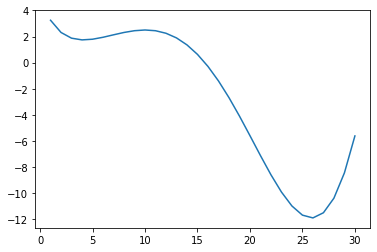

In [8]:
plt.plot(x_range, function(x_range))

### Задача 2

In [9]:
def function_int(x):
    return int(np.sin(x / 5) * np.exp(x / 10) + 5*np.exp(-x / 2))

In [29]:
h = lambda x: int(function(x))

In [11]:
function_int(10)

2

In [34]:
x_range = np.arange(1, 30)
y_range = np.array([h(i) for i in x_range])

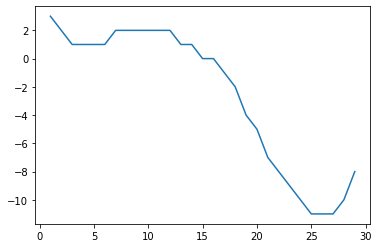

In [35]:
plt.plot(x_range, y_range)

In [23]:
differential_evolution(function_int, [(1, 3000)])

     fun: -2122678974837313186753105003463127135838493541568665362667852415495591593763334924547232383647162936295015122281773902973263413248
     jac: array([-2.95515046e+124])
 message: 'Optimization terminated successfully.'
    nfev: 273
     nit: 10
 success: True
       x: array([2978.97699876])

In [33]:
minimize(function_int, x0=30, method="BFGS")

      fun: -5
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([30.])

### Задача 3

In [43]:
minimize(h, method="BFGS", x0=30)

      fun: -5
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([30.])

In [44]:
differential_evolution(h, [(1, 30)])

     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 122
     nit: 7
 success: True
       x: array([24.21958385])